In [1]:
import pandas as pd
import pickle as pkl

## Converting pkl file to csv

In [2]:

with open("AgesAndHeights.pkl", 'rb') as file:
    object = pkl.load(file)
    
df = pd.DataFrame(object)
df.to_csv('Height_Prediction.csv')

## Loading csv file

In [3]:
df = pd.read_csv('Height_Prediction.csv')
df.head()

,Unnamed: 0,Age,Height
0,0,14.767874,59.627484
1,1,3.107671,36.146453
2,2,7.266917,46.912878
3,3,1.815180,29.125660
4,4,16.753758,68.170414


In [4]:
df.shape

(100, 3)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   Age         100 non-null    float64
 2   Height      100 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


In [6]:
df.describe()

,Unnamed: 0,Age,Height
count,100.000000,100.000000,100.000000
mean,49.500000,7.966138,45.955674
std,29.011492,5.321621,10.787318
min,0.000000,-0.780853,27.332513
25%,24.750000,3.048885,36.320107
50%,49.500000,7.795597,46.178251
75%,74.250000,11.464331,53.994166
max,99.000000,17.887852,68.170414


## Dropping Unnamed: 0

In [7]:
df.drop('Unnamed: 0', axis = 1, inplace = True)

In [8]:
df.head()

,Age,Height
0,14.767874,59.627484
1,3.107671,36.146453
2,7.266917,46.912878
3,1.815180,29.125660
4,16.753758,68.170414


## Visualising the Data

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Height'}>]], dtype=object)

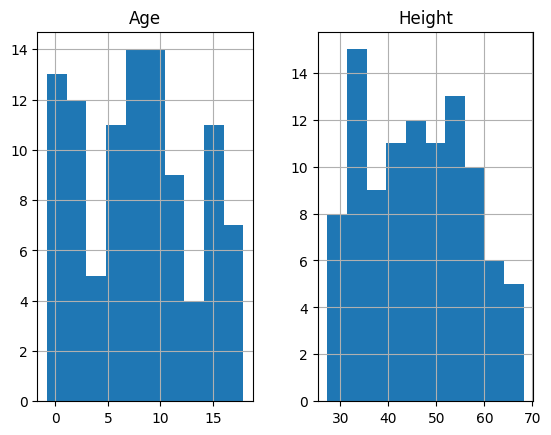

In [9]:
df.hist()

## Data Cleaning

In [10]:
cleaned_data = df[df['Age'] > 0]
cleaned_data

,Age,Height
0,14.767874,59.627484
1,3.107671,36.146453
2,7.266917,46.912878
3,1.815180,29.125660
4,16.753758,68.170414
...,...,...
95,7.323712,46.857505
96,5.591509,39.339990
97,2.625606,32.918925
98,5.519293,40.704154


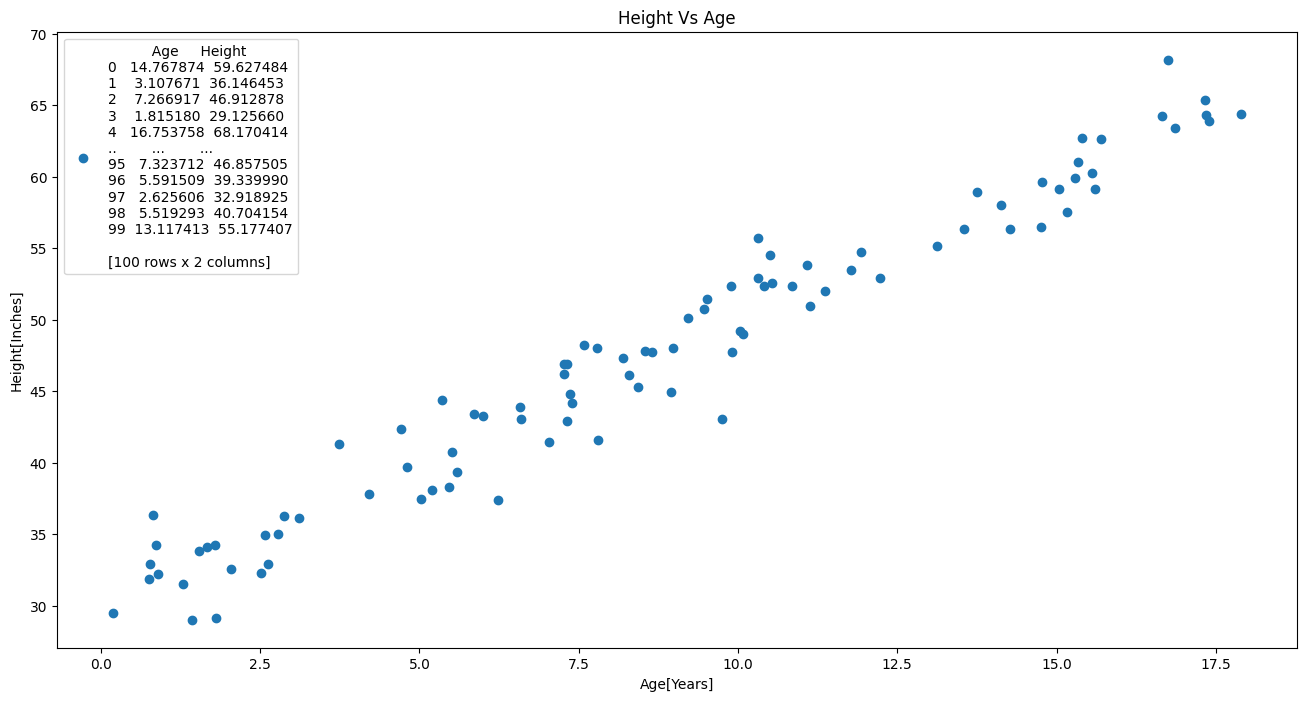

In [11]:
import matplotlib.pyplot as plt 
%matplotlib inline

ages = cleaned_data['Age']
heights = cleaned_data['Height']

plt.figure(figsize=(16, 8))
plt.scatter(x = ages, y = heights, label = df)
plt.title('Height Vs Age')
plt.xlabel('Age[Years]')
plt.ylabel('Height[Inches]')
plt.legend()

## Build the Model and Train it

In [12]:
parameter = {'alpha': 40, 'beta': 4}

def y_hat(age, params):
    alpha = params['alpha']
    beta = params['beta']
    return alpha + beta * age

y_hat(5, parameter)

60

In [13]:
def learn_parameters(data, params):
    x, y = data['Age'], data['Height']
    x_bar, y_bar = x.mean(), y.mean()
    x, y = x.to_numpy(), y.to_numpy()
    beta = sum(((x-x_bar) * (y-y_bar)) / sum((x - x_bar) ** 2))
    alpha = y_bar - beta * x_bar
    params['alpha'] = alpha
    params['beta'] = beta

In [14]:
new_parameter = {'alpha':0 , 'beta': 0}
learn_parameters(cleaned_data, new_parameter)
new_parameter

{'alpha': 29.96185761461583, 'beta': 2.0014168989106316}

In [15]:
new_parameter = {'alpha': -2, 'beta': 1000}
learn_parameters(cleaned_data, new_parameter)
new_parameter

{'alpha': 29.96185761461583, 'beta': 2.0014168989106316}

## predicting on untrained data

In [16]:
spaced_ages = list(range(19))
spaced_untrained_predictions = [y_hat(x, parameter) for x in spaced_ages]
print(spaced_untrained_predictions)

[40, 44, 48, 52, 56, 60, 64, 68, 72, 76, 80, 84, 88, 92, 96, 100, 104, 108, 112]


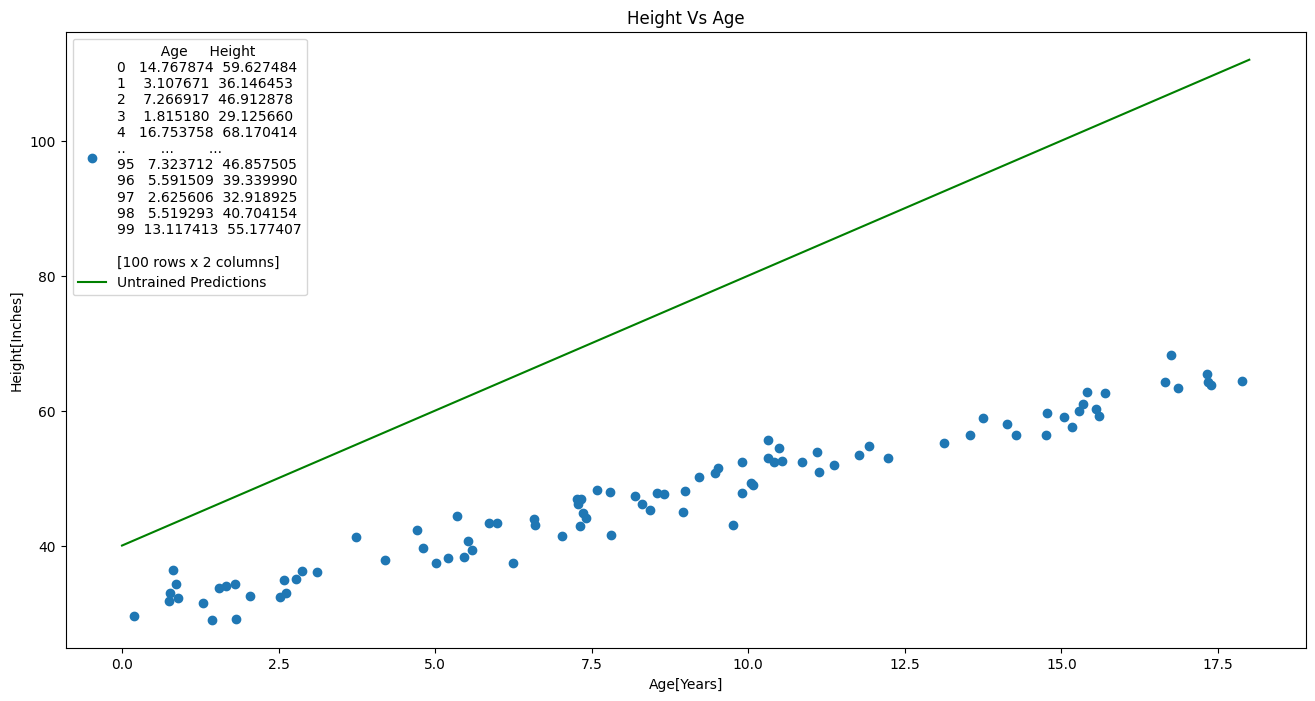

In [17]:
ages = cleaned_data['Age']
heights = cleaned_data['Height']

plt.figure(figsize=(16, 8))
plt.scatter(x = ages, y = heights, label = df)
plt.plot(spaced_ages, spaced_untrained_predictions, label = 'Untrained Predictions', color = 'green')
plt.title('Height Vs Age')
plt.xlabel('Age[Years]')
plt.ylabel('Height[Inches]')
plt.legend()

### The green line shows that the spaced_untrained_predictions have largely deviated from the actual values and the accuracy is very poor. Hence, accuracy needs to be increased for which we need to train the data

[29.96185761461583, 31.96327451352646, 33.96469141243709, 35.966108311347725, 37.96752521025836, 39.96894210916899, 41.97035900807962, 43.97177590699025, 45.97319280590088, 47.97460970481151, 49.97602660372215, 51.97744350263278, 53.97886040154341, 55.98027730045404, 57.98169419936467, 59.9831110982753, 61.984527997185936, 63.98594489609657, 65.98736179500719]


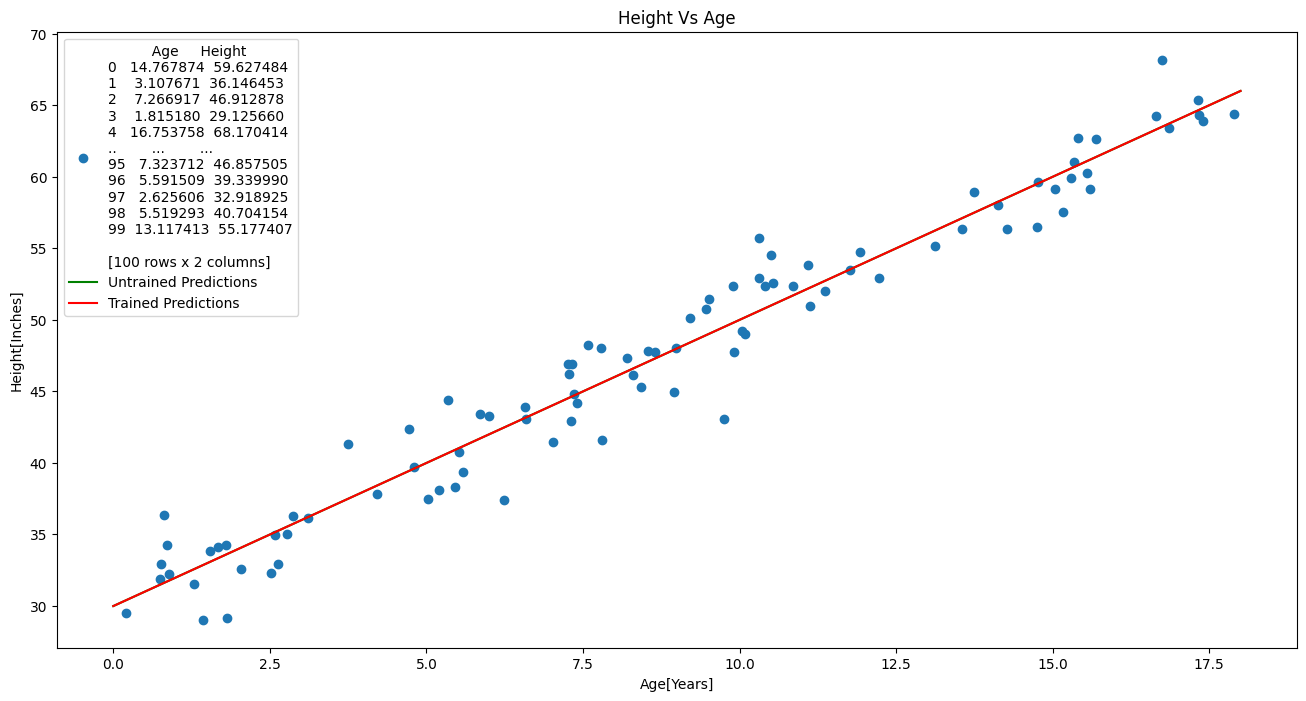

In [18]:
spaced_untrained_predictions = [y_hat(x, new_parameter) for x in spaced_ages]
print(spaced_untrained_predictions)

plt.figure(figsize=(16, 8))
plt.scatter(x = ages, y = heights, label = df)
plt.plot(spaced_ages, spaced_untrained_predictions, label = 'Untrained Predictions', color = 'green')
plt.plot(spaced_ages, spaced_untrained_predictions, label = 'Trained Predictions', color = 'red')

plt.title('Height Vs Age')
plt.xlabel('Age[Years]')
plt.ylabel('Height[Inches]')
plt.legend()

## new_parameters as it contains the accurate value of alpha and beta and stores it in a list named spaced_trained_predictions

## Make Predictions on Unseen Data

In [26]:
df[df['Age'] >= 10]

,Age,Height
0,14.767874,59.627484
4,16.753758,68.170414
11,14.749485,56.456782
12,15.285452,59.870038
14,16.655342,64.236387
17,11.923862,54.751892
19,11.362023,51.998370
22,10.312061,55.704812
23,17.393353,63.861097
24,10.310031,52.919905


In [28]:
new_age = int(input('Enter age to predict height: '))
print(f'New age: {new_age}')
y_hat(new_age, new_parameter)

New age: 13


55.98027730045404